## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set_style("whitegrid")

import sklearn 

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

print (sklearn.__version__)
print (pd.__version__)
print (np.__version__)
print (sns.__version__)

0.19.1
0.20.3
1.16.1
0.9.0


## Load Data

In [2]:
features_train = pd.read_csv('../data/dengue_features_train.csv')
labels_train = pd.read_csv('../data/dengue_labels_train.csv')

features_test = pd.read_csv('../data/dengue_features_test.csv')

In [3]:
# Join train labes and features
train_dataset = features_train.merge(labels_train, 
                                    left_on=['city', 'year', 'weekofyear'], 
                                    right_on=['city', 'year', 'weekofyear'],
                                    how='inner')

In [4]:
# Feature seleccion: I remove the column week_start_date and city

features = list(filter(lambda x : x not in ['city', 'week_start_date'], train_dataset.columns))

In [5]:
#train_dataset = train_dataset[features]
#train_dataset.head()

In [6]:
def show_barplot_missing_values(df):

    max_number_of_rows = df.describe().T['count'].max()
    number_of_values   = df.describe().T['count']

    fig = plt.figure(figsize=(10, 10))
    font = {'size'   : 12}
    plt.rc('font', **font)

    ax = sns.barplot(x = max_number_of_rows - number_of_values, color='#A5DF00', edgecolor=".2",
                y = train_dataset.describe().T.index)

    ax.axes.set_title("Number of missing values for each feature", fontsize=20)
    


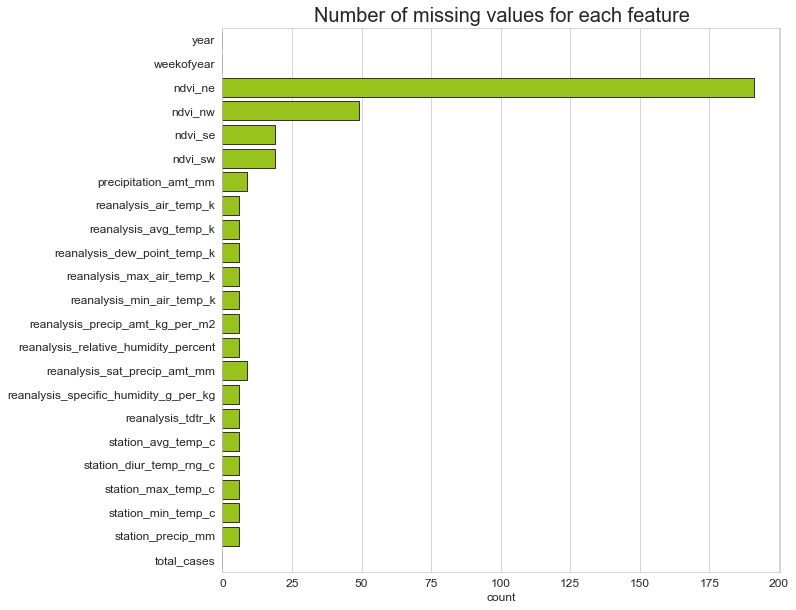

In [7]:
show_barplot_missing_values(train_dataset[train_dataset['city'] == 'sj'])

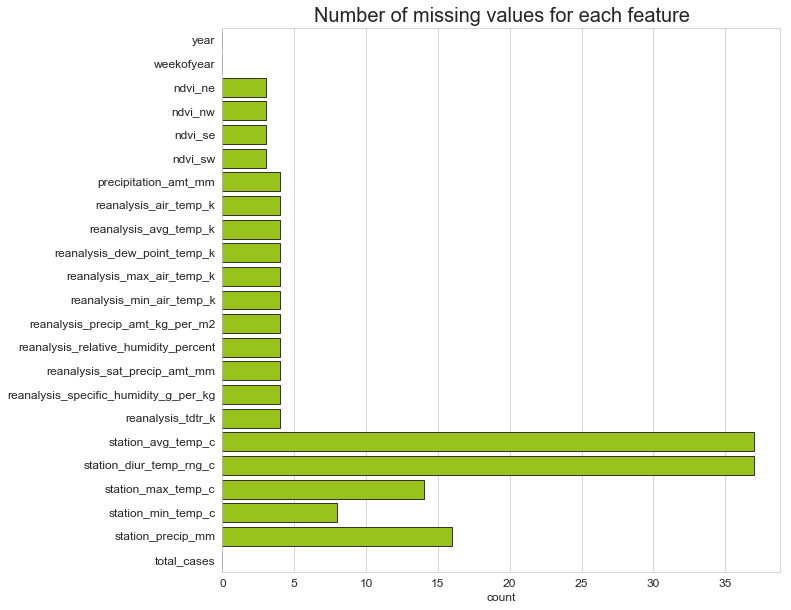

In [8]:
show_barplot_missing_values(train_dataset[train_dataset['city'] == 'iq'])

In [34]:
for city in train_dataset['city'].unique():
    
    train_dataset_city = train_dataset.loc[train_dataset['city']==city,]
    train_dataset_city.fillna(method='ffill', inplace=True)
    
    print(train_dataset_city.describe().T)

                                       count         mean        std  \
year                                   936.0  1998.826923   5.212076   
weekofyear                             936.0    26.503205  15.021909   
ndvi_ne                                936.0     0.057726   0.104907   
ndvi_nw                                936.0     0.066542   0.091467   
ndvi_se                                936.0     0.176221   0.057586   
ndvi_sw                                936.0     0.166037   0.055823   
precipitation_amt_mm                   936.0    35.316485  44.655240   
reanalysis_air_temp_k                  936.0   299.158243   1.237297   
reanalysis_avg_temp_k                  936.0   299.271543   1.219798   
reanalysis_dew_point_temp_k            936.0   295.104736   1.570075   
reanalysis_max_air_temp_k              936.0   301.393162   1.259469   
reanalysis_min_air_temp_k              936.0   297.297863   1.295172   
reanalysis_precip_amt_kg_per_m2        936.0    30.401154  35.53

## Data Imputation (mean)

In [31]:
df = pd.DataFrame()
for city in train_dataset['city'].unique():

    train_dataset_city = train_dataset.loc[train_dataset['city']==city,]
    
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    
    train_dataset_city[features] = pd.DataFrame(imp.fit_transform(train_dataset_city[features]))
    
    train_dataset_city.columns = train_dataset_city.columns
    train_dataset_city.index = train_dataset_city.index
    
    train_dataset_city.loc['city'] = city
    
    if len(df) == 0:
        df = train_dataset_city
    else:
        df = pd.concat([df, train_dataset_city], axis=0)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [28]:
df = df[df['city']=='iq']
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,NaN,NaN,2000-07-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,iq,NaN,NaN,2000-07-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,iq,NaN,NaN,2000-07-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,iq,NaN,NaN,2000-07-22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,iq,NaN,NaN,2000-07-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
train_dataset_mean = df

df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,936.0,1998.826923,5.212076,1990.000000,1994.000000,1999.000000,2003.000000,2008.000000
weekofyear,936.0,26.503205,15.021909,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,936.0,0.057925,0.095584,-0.406250,0.021225,0.057925,0.098850,0.493400
ndvi_nw,936.0,0.067469,0.090023,-0.456100,0.020469,0.067469,0.112700,0.437100
ndvi_se,936.0,0.177655,0.056583,-0.015533,0.140121,0.177655,0.211596,0.393129
ndvi_sw,936.0,0.165956,0.055501,-0.063457,0.129925,0.165956,0.202264,0.381420
precipitation_amt_mm,936.0,35.470809,44.390936,0.000000,0.000000,21.435000,51.662500,390.600000
reanalysis_air_temp_k,936.0,299.163653,1.232456,295.938571,298.197143,299.239286,300.130714,302.200000
reanalysis_avg_temp_k,936.0,299.276920,1.214721,296.114286,298.305357,299.378571,300.223214,302.164286
reanalysis_dew_point_temp_k,936.0,295.109519,1.564898,289.642857,293.853214,295.447143,296.415714,297.795714


## Check data imputation

### Get columns with missing values

In [16]:
# Select features with missing values

train_dataset_describe = train_dataset.describe().T

max_number_values      = train_dataset_describe['count'].max()
train_dataset_describe = train_dataset_describe[train_dataset_describe['count'] < max_number_values]

columns_missing_data = train_dataset_describe.index

### Scale dataset

In [17]:
# Escalamos todos los datos.

scaler = StandardScaler().fit(train_dataset_mean[features])
train_dataset_mean[features] = pd.DataFrame(scaler.transform(train_dataset_mean[features]), 
                                            columns = train_dataset_mean[features].columns)

train_dataset = train_dataset.dropna()
scaler = StandardScaler().fit(train_dataset[features])
train_dataset[features]= pd.DataFrame(scaler.transform(train_dataset[features]), 
                                      columns=train_dataset[features].columns)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
train_dataset.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,-2.115314,-0.570675,1990-04-30,-0.122207,-0.253846,-0.095140,-0.328502,-0.814598,-0.808198,...,-1.269681,-0.814598,-1.842236,-0.698244,-1.409262,-0.619643,-1.625800,-1.336941,-0.508735,-0.557575
1,sj,-2.115314,-0.503514,1990-05-07,0.215513,0.064732,-0.580536,-0.587307,-0.573640,-0.340090,...,-0.721257,-0.573640,-0.946406,-0.769831,-0.405893,-0.862664,-0.445878,0.080211,-0.659830,-0.525153
2,sj,-2.115314,-0.436353,1990-05-14,-0.767304,0.319858,-0.649827,-0.407716,-0.302099,0.077752,...,-0.079473,-0.302099,0.025644,-0.789717,-0.405893,-0.810119,-0.189373,0.466707,0.009886,-0.557575
3,sj,-2.115314,-0.369191,1990-05-21,-0.079130,0.917244,0.295500,0.352911,-0.746481,0.228552,...,-0.314539,-0.746481,-0.090099,-0.753923,0.191619,-0.678756,0.374938,0.788787,-0.753753,-0.589996
4,sj,-2.115314,-0.302030,1990-05-28,0.403295,1.059203,0.613169,0.486861,-0.928126,0.618119,...,-0.297707,-0.928126,0.263716,-0.590863,1.352821,0.516646,1.247054,1.175283,-0.717000,-0.492732


In [15]:
train_dataset_mean.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city
0,-2.040448,-0.566356,-0.066251,-0.210451,-0.068895,-0.291964,-0.765743,-0.830908,-1.179580,-1.860699,...,-0.765743,-1.778827,-0.642626,-1.374502,-0.570403,-1.569771,-1.339051,-0.499046,-0.474407,sj
1,-2.040448,-0.499753,0.286781,0.114163,-0.561315,-0.557350,-0.526790,-0.360778,-0.622679,-0.850821,...,-0.526790,-0.893881,-0.715193,-0.376431,-0.818006,-0.391372,0.064280,-0.655999,-0.451461,sj
2,-2.040448,-0.433150,-0.740594,0.374121,-0.631609,-0.373192,-0.257508,0.058868,-0.276036,0.123392,...,-0.257508,0.066360,-0.735351,-0.376431,-0.764470,-0.135199,0.447006,0.039684,-0.474407,sj
3,-2.040448,-0.366547,-0.021220,0.982824,0.327398,0.406776,-0.698193,0.210319,0.002415,0.041738,...,-0.698193,-0.047976,-0.699067,0.217926,-0.630630,0.428383,0.765945,-0.753564,-0.497353,sj
4,-2.040448,-0.299943,0.483076,1.127472,0.649664,0.544132,-0.878327,0.601568,0.349058,0.377738,...,-0.878327,0.301540,-0.533776,1.372997,0.587310,1.299373,1.148672,-0.715387,-0.428515,sj


### Concatenate both dataframes: imputed values + drop values

In [66]:
train_dataset['Imputed'] = False
train_dataset_mean['Imputed'] = True

In [69]:
train_dataset_mean.columns = train_dataset.columns

train_dataset.reset_index(inplace=True)
train_dataset_mean.reset_index(inplace=True)
train_dataset_global = pd.concat([train_dataset, train_dataset_mean], ignore_index=True)

ValueError: Length mismatch: Expected axis has 25 elements, new values have 26 elements

In [12]:
train_dataset_global.head()

,index,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,Imputed
0,0,-2.115314,-0.570675,-0.122207,-0.253846,-0.095140,-0.328502,-0.814598,-0.808198,-1.190146,...,-0.814598,-1.842236,-0.698244,-1.409262,-0.619643,-1.625800,-1.336941,-0.508735,-0.557575,False
1,1,-2.115314,-0.503514,0.215513,0.064732,-0.580536,-0.587307,-0.573640,-0.340090,-0.634981,...,-0.573640,-0.946406,-0.769831,-0.405893,-0.862664,-0.445878,0.080211,-0.659830,-0.525153,False
2,2,-2.115314,-0.436353,-0.767304,0.319858,-0.649827,-0.407716,-0.302099,0.077752,-0.289418,...,-0.302099,0.025644,-0.789717,-0.405893,-0.810119,-0.189373,0.466707,0.009886,-0.557575,False
3,3,-2.115314,-0.369191,-0.079130,0.917244,0.295500,0.352911,-0.746481,0.228552,-0.011835,...,-0.746481,-0.090099,-0.753923,0.191619,-0.678756,0.374938,0.788787,-0.753753,-0.589996,False
4,4,-2.115314,-0.302030,0.403295,1.059203,0.613169,0.486861,-0.928126,0.618119,0.333727,...,-0.928126,0.263716,-0.590863,1.352821,0.516646,1.247054,1.175283,-0.717000,-0.492732,False


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


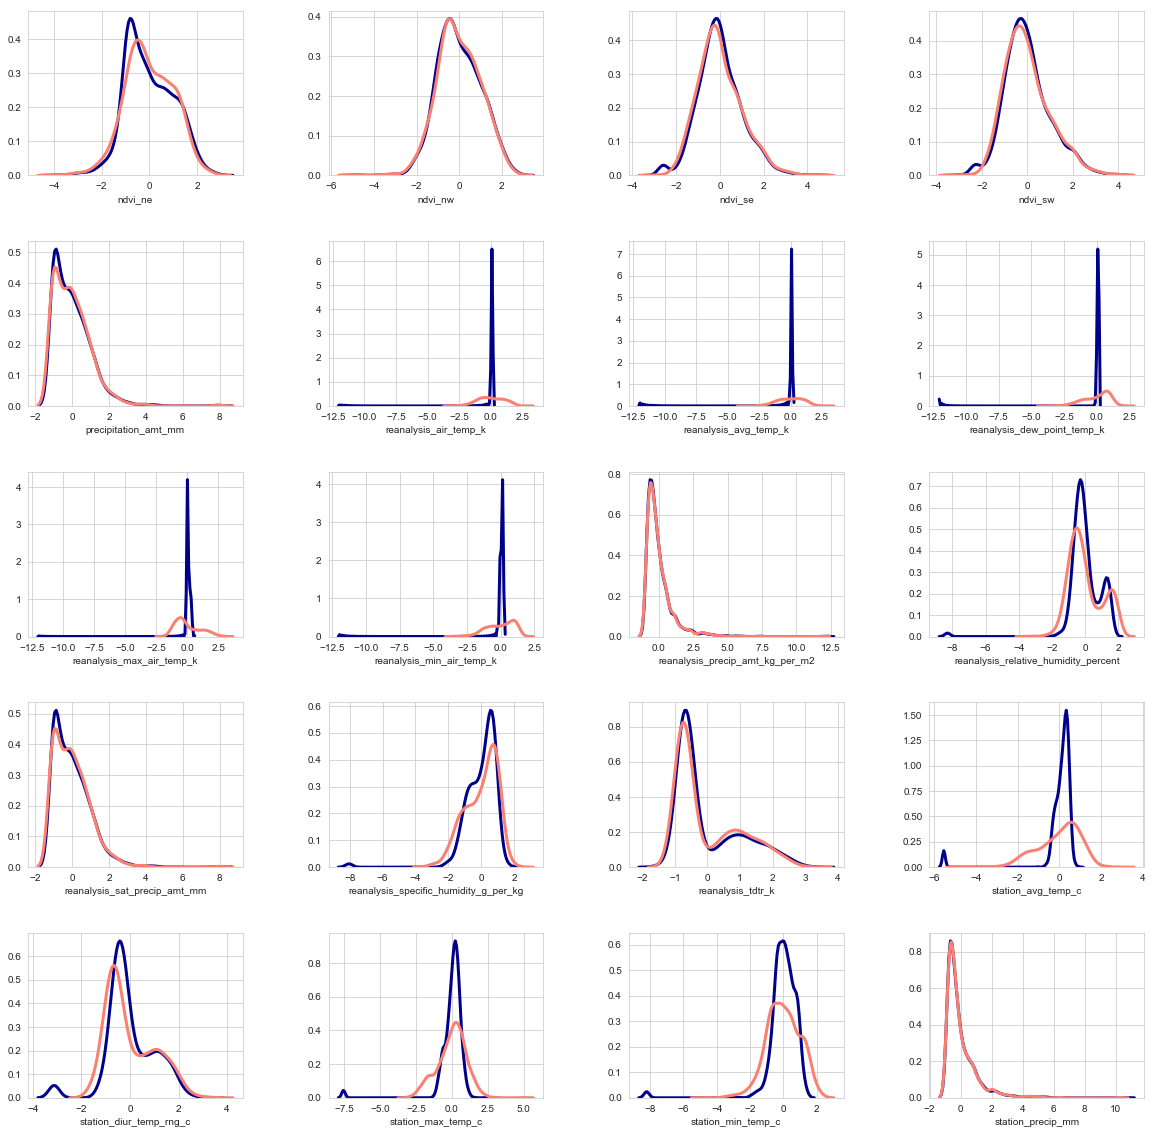

In [13]:
#from matplotlib.pyplot import figure

#figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(columns_missing_data):

    ax = fig.add_subplot(5, 4, i+1)
    
    data_imputed = train_dataset_global[train_dataset_global['Imputed'] == True][column]
    data_no_imputed = train_dataset_global[train_dataset_global['Imputed'] == False][column]
    
    sns.distplot(data_imputed, hist=False, kde=True, bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3})

    sns.distplot(data_no_imputed, hist=False, kde=True, bins=int(180/5), color = 'salmon', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3})
   # ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')